# **1. Setup**

In [1]:
import tensorflow as tf
import os

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

# **2. Remove dodgy images**

In [4]:
import cv2
import imghdr

In [5]:
data_dir = '/content/drive/MyDrive/data2'

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# **3. Load Data**

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/data2')

Found 305 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

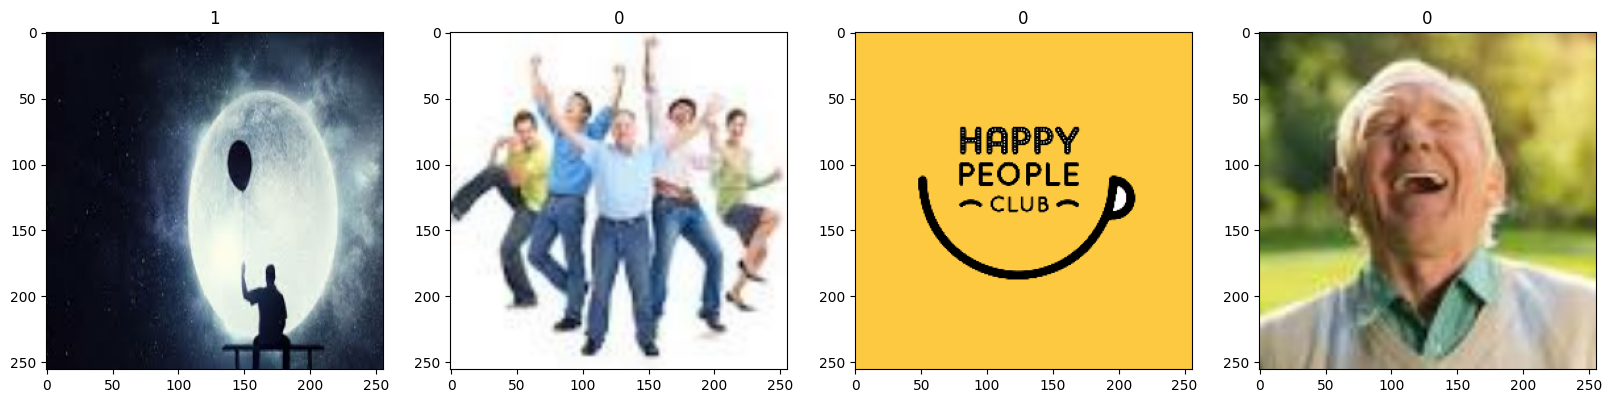

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# **4. Scale Data**

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[0.33213848, 0.2537071 , 0.21836704],
          [0.13616727, 0.05773591, 0.01459865],
          [0.5179764 , 0.43965992, 0.39606312],
          ...,
          [0.40425092, 0.36861214, 0.30206037],
          [0.2998315 , 0.26453736, 0.19787072],
          [0.47737437, 0.44208026, 0.3754136 ]],
 
         [[0.35740045, 0.27896908, 0.24362901],
          [0.2108998 , 0.13251232, 0.08924339],
          [0.57997066, 0.504078  , 0.4532098 ],
          ...,
          [0.43649164, 0.40085286, 0.33430108],
          [0.24398205, 0.20868793, 0.14202127],
          [0.44725022, 0.4119561 , 0.35025403]],
 
         [[0.37220353, 0.29377216, 0.25535586],
          [0.31941468, 0.24105224, 0.19770819],
          [0.642517  , 0.5680072 , 0.5129903 ],
          ...,
          [0.46466833, 0.42902955, 0.36557212],
          [0.18796046, 0.15266635, 0.08909404],
          [0.38838863, 0.3515564 , 0.29731938]],
 
         ...,
 
         [[0.36140984, 0.29622   , 0.23583539],
          [0.38810

# **5. Split Data**

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train_size

7

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# **6. Build Deep Learning Model**

In [18]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# **7. Train**

In [24]:
logdir='logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 26s 3s/step - loss: 0.8165 - accuracy: 0.5134 - val_loss: 0.6807 - val_accuracy: 0.5000
Epoch 2/20
7/7 [==============================] - 37s 5s/step - loss: 0.6712 - accuracy: 0.5357 - val_loss: 0.6583 - val_accuracy: 0.7500
Epoch 3/20
7/7 [==============================] - 23s 3s/step - loss: 0.6154 - accuracy: 0.7411 - val_loss: 0.4212 - val_accuracy: 0.8906
Epoch 4/20
7/7 [==============================] - 22s 3s/step - loss: 0.4844 - accuracy: 0.7946 - val_loss: 0.3624 - val_accuracy: 0.8594
Epoch 5/20
7/7 [==============================] - 22s 3s/step - loss: 0.4585 - accuracy: 0.7634 - val_loss: 0.3365 - val_accuracy: 0.7500
Epoch 6/20
7/7 [==============================] - 22s 3s/step - loss: 0.4737 - accuracy: 0.7812 - val_loss: 0.5252 - val_accuracy: 0.7031
Epoch 7/20
7/7 [==============================] - 29s 4s/step - loss: 0.4537 - accuracy: 0.7991 - val_loss: 0.2930 - val_accuracy: 0.9531
Epoch 8/20
7/7 [==================

# **8. Plot Performance**

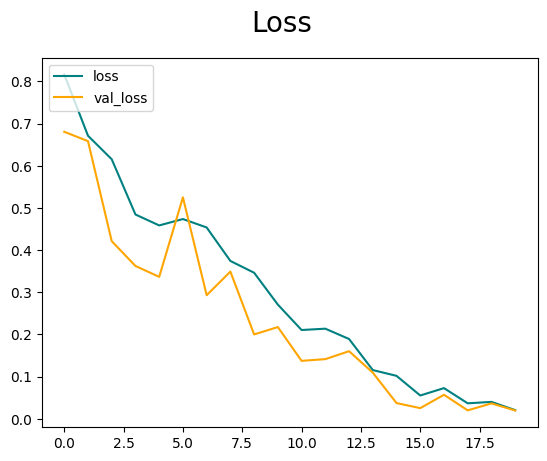

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

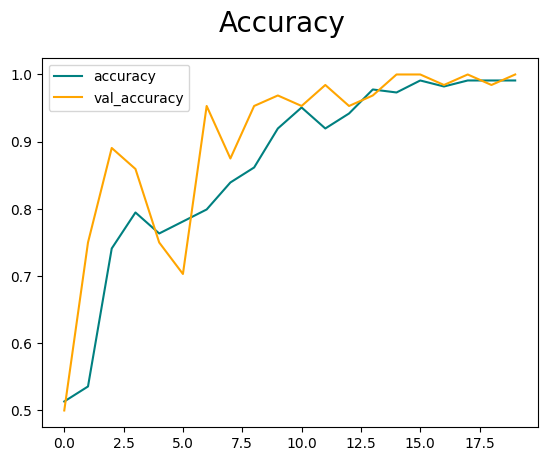

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# **9. Evaluate**

In [41]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [42]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [43]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 264ms/step


In [44]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9166667, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9411765, shape=(), dtype=float32)


# **10. Test**

In [45]:
import cv2

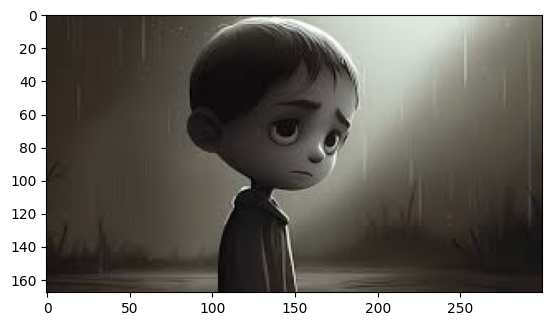

In [46]:
img = cv2.imread('/content/drive/MyDrive/st.jpg')
plt.imshow(img)
plt.show()

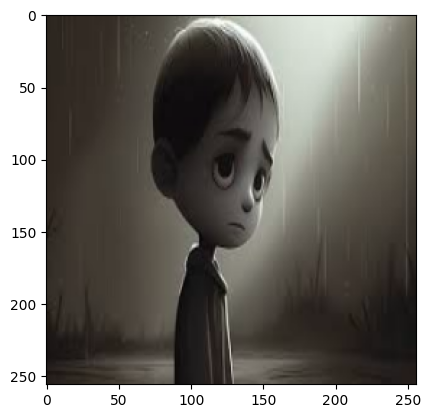

In [47]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [48]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 37ms/step


In [49]:
yhat

array([[0.99999034]], dtype=float32)

In [50]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# **11. Save the Model**

In [35]:
from tensorflow.keras.models import load_model

In [37]:
model.save(os.path.join('/content/drive/MyDrive/models','imageclassifier.h5'))

In [39]:
new_model = load_model('/content/drive/MyDrive/models/imageclassifier.h5')

In [40]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 172ms/step


array([[0.99999034]], dtype=float32)